In [1]:
import numpy as np
import matplotlib.pyplot as plt


import astropy.units as u
from uncertainties import ufloat
from uncertainties import unumpy as unp
%matplotlib inline 
from astropy.io import fits

from spectra import make_DF_from_GBM
from spectra import plot_Flux_Energy 
from spectra_LAT import plot_Flux_Energy_LAT 
from Sensitivity import plot_Sens
from Sensitivity import plot_ctools_Crab, plot_HEGRA_Crab
from Fitting_models import Plaw_LAT
tugreen = '#73ae14'

In [2]:
cmap = plt.cm.get_cmap('viridis')
viridis10 = cmap(0.1)
viridis9 = cmap(0.2)
viridis8 = cmap(0.28)
viridis7 = cmap(0.35)
viridis6 = cmap(0.42)
viridis5 = cmap(0.5)
viridis4 = cmap(0.6)
viridis3= cmap(0.7)
viridis2 = cmap(0.82)
viridis1 = cmap(0.9)
viridis0 = cmap(0.98)

# <font color = #73ae14>   Relevance of spectra for simulation

- Does it make sense to put the Crab spectrum into the tool? 
- What is the similarity among the transients? 
- What would spectrum look like in GEV-TEV range anyway? Is it detectable then? 

# <font color = #73ae14> ---> 1. Course / Shape 


### Currently used: Crab Spectrum
### A) ctools Version & B) HEGRA measurement 
plot_ctools_Crab(logEmin,logEmax,SED) or plot_HEGRA_CRAB(logEmin,logEmax,SED)
          - logEmin = lower limit of plotting interval, in logscale: 4 means 10^4 
          - logEmax = higher limit of plotting interval
          - SED = boolean, if True show E² * diff. Flux 

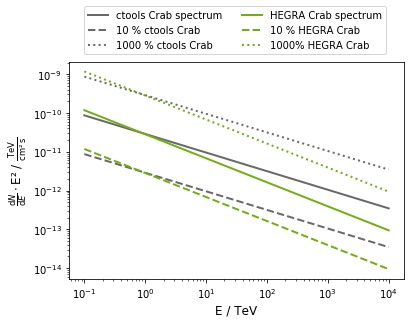

In [5]:
plot_ctools_Crab(-1,4,True,'dimgray')
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E} \cdot$E² / $\frac{\mathrm{TeV}}{\mathrm{cm}²\,\mathrm{s}}$', fontsize=12)
plot_HEGRA_Crab(-1,4,True,tugreen)
plt.legend(bbox_to_anchor=(0.03, 1.01, 1., .101),ncol=2)
plt.savefig('Plots/Spectra_Crab.pdf', bbox_inches='tight')

## LAT und GMB catalogs
- plot_Sens(scale,style), show sensitivity in $E² \cdot$ diff. Flux
        
       - Scale : Scale of x-axis, Kev,Mev,GeV as a string 
       - Style: energy bins or curve, string: binwise or curve 
- plot_Flux_Energy(GRB_name, Dataframe,loglow,loghigh, SED,EBL,Redshift,plot_col)
- plot_Flux_Energy_LAT(GRB_name,loglow,loghigh, SED,EBL,Redshift,plot_col)

       - GRB_name : sections from the name of GRB, e.g. '090902' or '0902' etc.
       - Dataframe: For GBM data, first execute make_DF_from_GBM with GRBST.fits and give that DF to function 
       - loglow: lower energy threshold in logscale, 5 gives 10^5 etc.  
       - loglow: higher energy threshold for plot 
       - SED: Boolean, if True show E² *diff.flux 
       - EBL: Boolean, if True show absorption in EBL 
       - Redshift : int, neded for EBL calculations 
       - plot_col: RGB or python color names, plotting color 


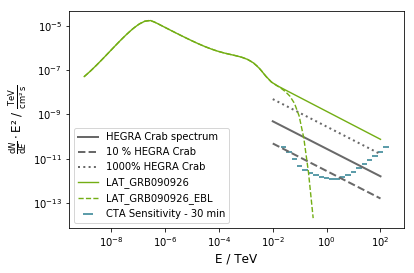

In [7]:
plot_Sens('Tev','binwise',viridis6)
plot_HEGRA_Crab(-2,2,True,'dimgray')
plot_Flux_Energy_LAT('GRB090926',-9,2,True,False,0,tugreen)
plot_Flux_Energy_LAT('GRB090926',-9,-0.5,True,True,2.14,tugreen)
plt.savefig('Plots/Example.pdf')

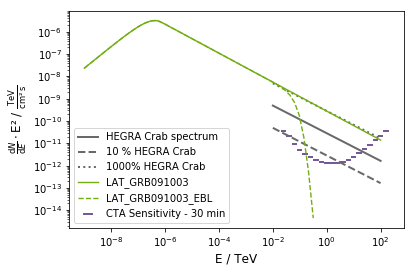

In [10]:
plot_Sens('Tev','binwise',viridis10)
plot_HEGRA_Crab(-2,2,True,'dimgray')
plot_Flux_Energy_LAT('GRB091003',-9,2,True,False,0,tugreen)
plot_Flux_Energy_LAT('GRB091003',-9,-0.5,True,True,2.14,tugreen)

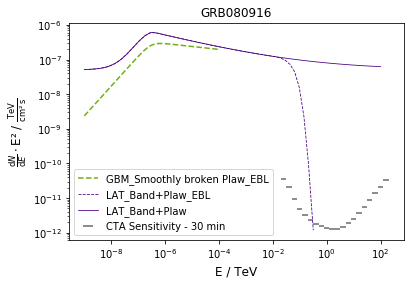

In [10]:
Table = make_DF_from_GBM('Kataloge/GRBST.fits')
plot_Flux_Energy('080916',Table,-9,-4,True,True,1.1,tugreen)
plot_Flux_Energy_LAT('GRB080916',-9,-0.5,True,True,1.99,'indigo')
plot_Flux_Energy_LAT('GRB080916',-9,2,True,False,1.99,'indigo')
plot_Sens('Tev','binwise')

##  Measured spectra from galactic transients and short AGNs 

### 1. PKS2155, measured flare 2006 

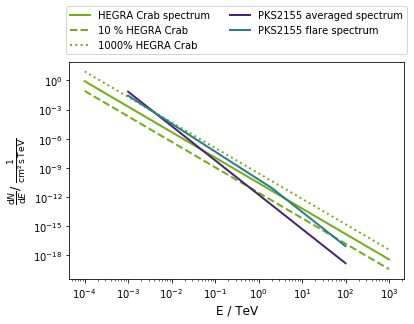

In [3]:
Phi0 = ufloat(1.81e-12,0.13e-12)
alpha = ufloat(3.53,0.06)
E0 = 1 #

Phi0_Flare = ufloat(2.06e-10,0.16e-10)
alpha_Flare = ufloat(2.71,0.06)
beta_Flare= ufloat(3.53,0.05)
EB_Flare = ufloat(0.430,0.022) # GeV 


Eplot = np.linspace(0.001,100)

def Plaw_u(E,E0,Phi,alpha):
    return Phi*(E/E0)**(-alpha)
@np.vectorize
def Broken(E,E0,EB,Phi,alpha1,alpha2):
    if E <= EB:
        return Phi*(E/E0)**(-alpha1)
    else:
        return Phi*(EB/E0)**(alpha2-alpha1)*(E/E0)**(-alpha2)

Results = Plaw_u(Eplot,E0,Phi0,alpha)
Values = unp.nominal_values(Results)
Errors = unp.std_devs(Results)

Results_Flare = Broken(Eplot,E0,EB_Flare,Phi0_Flare,alpha_Flare,beta_Flare)
Values_Flare = unp.nominal_values(Results_Flare)
Errors_Flare = unp.std_devs(Results_Flare)

plot_HEGRA_Crab(-4,3,False,tugreen)

plt.plot(Eplot,Values, color=viridis10,lw=2,label='PKS2155 averaged spectrum')
#plt.fill_between(Eplot,Values-Errors, Values+Errors,color='indigo', alpha=0.6)

plt.plot(Eplot,Values_Flare, color=viridis6,lw=2,label='PKS2155 flare spectrum')
#plt.fill_between(Eplot,Values-Errors, Values+Errors,color=viridis6,lw=2, alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(-0.025, 1.01, 1., .101),ncol=2)
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E}$/ $\frac{1}{\mathrm{cm}²\,\mathrm{s} \, \mathrm{TeV}}$', fontsize=13)
plt.xlabel('E / TeV')
plt.savefig('Plots/Compare.pdf')

### 2. LS I+61°303, MAGIC measurement 
X-ray binary with VHE gamma-rays 

Text(0.5,0,'E / TeV')

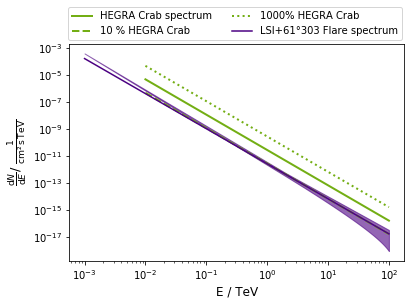

In [5]:
#Simple Power Law 
Phi0 = ufloat(2.7e-12,0.6e-12)
alpha = ufloat(2.6,0.2)

Eplot = np.linspace(0.001,100)
plot_HEGRA_Crab(-2,2,False,tugreen)

Results = Plaw_u(Eplot,E0,Phi0,alpha)
Values_LS = unp.nominal_values(Results)
Errors_LS = unp.std_devs(Results)

plt.plot(Eplot,Values_LS, color='indigo',label='LSI+61°303 Flare spectrum')
plt.fill_between(Eplot,Values_LS-Errors_LS, Values_LS+Errors_LS,color='indigo', alpha=0.6)

plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(0.01, 1.09, 1., .101),ncol=2)
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E}$/ $\frac{1}{\mathrm{cm}²\,\mathrm{s} \, \mathrm{TeV}}$', fontsize=13)
plt.xlabel('E / TeV')

### 3. HESSJ0632+057 / *Fermi*J032.6+057

Text(0.5,0,'E / TeV')

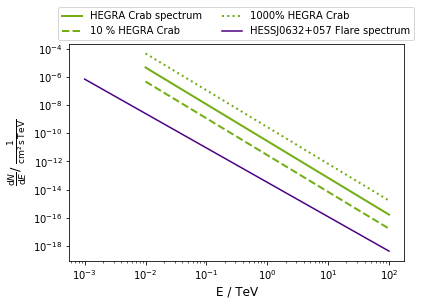

In [6]:
# Simple Power Law
from scipy.constants import e as elem
from scipy.integrate import quad 
Flux = ufloat(0.71e-11,0.15e-11)*1e-19/elem # aus erg pro Sekunde in TeV pro cm² s 
alpha = ufloat(2.45,0.05)
E0 = 1


def Plaw(E,E0,Phi,alpha):
    return Phi*(E/E0)**(-alpha)*E
# Flux to Differential Flux 
Int = quad(Plaw,0.0001,0.3,args=(E0,1,alpha.n)) ; Integral = ufloat(Int[0],Int[1])
Phi0 = Flux/(Integral)


Eplot = np.linspace(0.001,100)
plot_HEGRA_Crab(-2,2,False,tugreen)

Results = Plaw_u(Eplot,E0,Phi0,alpha)
Values = unp.nominal_values(Results)
Errors = unp.std_devs(Results)

plt.plot(Eplot,Values, color='indigo',label='HESSJ0632+057 Flare spectrum')
#plt.fill_between(Eplot,Values-Errors, Values+Errors,color='indigo', alpha=0.6)

plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(0.045, 1.09, 1., .101),ncol=2)
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E}$/ $\frac{1}{\mathrm{cm}²\,\mathrm{s} \, \mathrm{TeV}}$', fontsize=13)
plt.xlabel('E / TeV')

### 4. IC 310 Flare, MAGIC measurement 

Text(0.5,0,'E / GeV')

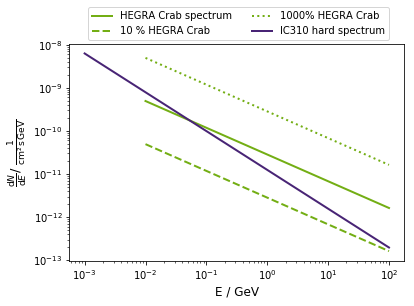

In [7]:
Flux = ufloat(6.08e-11,0.29e-11)/1## per cm² time, not per energy or *energy 
alpha = ufloat(1.90,0.04)
E0 = 1 

Int = quad(Plaw,0.0001,0.3,args=(E0,1,alpha.n)) ; Integral = ufloat(Int[0],Int[1])
Phi0 = Flux/(Integral)


Eplot = np.linspace(0.001,100)
plot_HEGRA_Crab(-2,2,True,tugreen)

Results = Plaw(Eplot,E0,Phi0,alpha)
Values = unp.nominal_values(Results)
Errors = unp.std_devs(Results)

plt.plot(Eplot,Values, color=viridis10,lw=2,label='IC310 hard spectrum')
#plt.fill_between(Eplot,Values-Errors, Values+Errors,color='indigo', alpha=0.6)

plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(-0.03, 1.09, 1., .101),ncol=2)
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E}$/ $\frac{1}{\mathrm{cm}²\,\mathrm{s} \, \mathrm{GeV}}$', fontsize=13)
plt.xlabel('E / GeV')

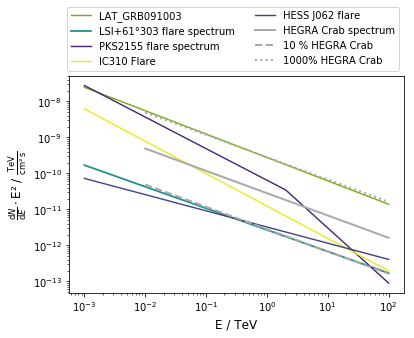

In [9]:
'''
Fitting functions
'''
def Plaw(E,E0,Phi,alpha):
    return Phi*(E/E0)**(-alpha)*E
def Plaw_u(E,E0,Phi,alpha):
    return Phi*(E/E0)**(-alpha)
@np.vectorize
def Broken(E,E0,EB,Phi,alpha1,alpha2):
    if E <= EB:
        return Phi*(E/E0)**(-alpha1)
    else:
        return Phi*(EB/E0)**(alpha2-alpha1)*(E/E0)**(-alpha2)
'''
Fits
'''
## IC310
Flux = ufloat(6.08e-11,0.29e-11)/1## per cm² time, not per energy or *energy 
alpha = ufloat(1.90,0.04)
E0 = 1 
Int = quad(Plaw,0.0001,0.3,args=(E0,1,alpha.n)) ; Integral = ufloat(Int[0],Int[1])
Phi0 = Flux/(Integral)
Eplot = np.linspace(0.001,100)
Results = Plaw(Eplot,E0,Phi0,alpha)
Values_IC310 = unp.nominal_values(Results)
Errors_IC310 = unp.std_devs(Results)

## HESS
Flux = ufloat(0.71e-11,0.15e-11)*1e-17/elem # aus erg pro Sekunde in TeV pro cm² s 
alpha = ufloat(2.45,0.05)
E0 = 1
Int = quad(Plaw,0.0001,0.3,args=(E0,1,alpha.n)) ; Integral = ufloat(Int[0],Int[1])
Phi0 = Flux/(Integral)
Results = Plaw_u(Eplot,E0,Phi0,alpha)
Values_Hess = unp.nominal_values(Results)
Errors_Hess = unp.std_devs(Results)

## LSI
Phi0 = ufloat(2.7e-12,0.6e-12)
alpha = ufloat(2.6,0.2)
Results = Plaw_u(Eplot,E0,Phi0,alpha)
Values_LSI = unp.nominal_values(Results)
Errors_LSI = unp.std_devs(Results)

## PKS 
Phi0 = ufloat(1.81e-12,0.13e-12)
alpha = ufloat(3.53,0.06)
E0 = 1 
Phi0_Flare = ufloat(2.06e-10,0.16e-10)
alpha_Flare = ufloat(2.71,0.06)
beta_Flare= ufloat(3.53,0.05)
EB_Flare = ufloat(0.430,0.022) # GeV 

Results = Plaw_u(Eplot,E0,Phi0,alpha)
Values_PKS = unp.nominal_values(Results)
Errors_PKS = unp.std_devs(Results)

Results_Flare = Broken(Eplot,E0,EB_Flare,Phi0_Flare,alpha_Flare,beta_Flare)
Values_Flare = unp.nominal_values(Results_Flare)
Errors_Flare = unp.std_devs(Results_Flare)

plot_Flux_Energy_LAT('GRB091003',-3,2,True,False,1.99,tugreen)
plt.plot(Eplot,Values_LSI*Eplot*Eplot, color=viridis5,lw=1.8,label='LSI+61°303 flare spectrum')
plt.plot(Eplot,Values_Flare*Eplot*Eplot, color=viridis10,lw=1.4,label='PKS2155 flare spectrum')
plt.plot(Eplot,Values_IC310,color=viridis0,lw=1.4,label='IC310 Flare')
plt.plot(Eplot,Values_Hess*Eplot*Eplot,color=viridis9, lw=1.4, label='HESS J062 flare')
#plot_Sens('Tev','binwise')
plot_HEGRA_Crab(-2,2,True,'darkgrey')
plt.legend(bbox_to_anchor=(-0.02, 1.0, 1., .101),ncol=2)
plt.savefig('Plots/Comparison.pdf',bbox_inches = 'tight')
#plt.savefig('Plots_DE/jpeg/Comparison.jpeg',bbox_inches = 'tight')

##  List of LAT GRBs announced via CGN notices von *Fermi* results

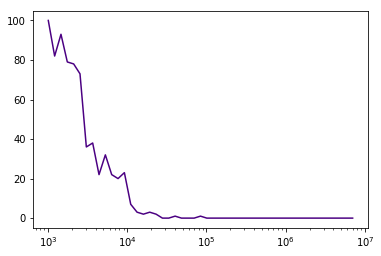

In [173]:
Datei = fits.open('FERMI/LLE_GRBs/GRB090902/LLE/gll_pha_bn110721200_v02.fit',ignore_missing_end=True)
Spec = Datei['SPECTRUM'] ## Counts vs Channal 
C = Spec.data['CHANNEL']
N = Spec.data['COUNTS']

Bound = Datei['EBOUNDS'] ## Channal vs Energie 
C_cal = Bound.data['CHANNEL']

Min = Bound.data['E_MIN']
Max = Bound.data['E_MAX']
Energy = (Max-Min)/2
plt.plot(Energy[0:len(Energy)-1],N[0:len(Energy)-1],'-', color='indigo') 
plt.xscale('log')

## To be compared

/home/jana/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


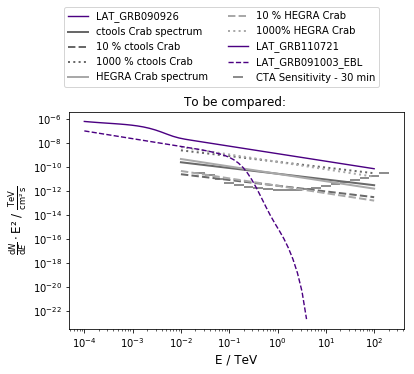

In [21]:
plot_Sens('Tev','binwise','dimgray')
plot_Flux_Energy_LAT('GRB090926',-4,2,True,False,0,'indigo') ## Exponential LC 
plot_ctools_Crab(-2,2,True,'dimgray')
plot_HEGRA_Crab(-2,2,True,'darkgray')
plot_Flux_Energy_LAT('GRB110721',-4,2,True,False,0,'indigo') ## Schmnaler Gauß 
plot_Flux_Energy_LAT('GRB091003',-4,0.6,True,True,0.9,'indigo')
xdata = np.logspace(3,9,1000)
plt.title('To be compared: ')
plt.savefig('Plots/Spectrum_Vergleich.pdf')
plt.legend(bbox_to_anchor=(-0.03, 1.09, 1., .101),ncol=2)

# <font color = #73ae14> ---> 2. Amplitude / Strength

### Which assumptions are realistic for times and strengths? 

Comparison with Crab? 
- 1 erg = $0.1 \mu$J (1 eV = $1.602 \cdot 10^{-19} $J)
- Fluence in erg/cm² = Energy per area 
- flow in erg/cm² s divided by mean duration 

How to reach Crab Unit for energy range in different units:
- Crab spectrum in about the energy range = $\frac{\mathrm{d}N}{\mathrm{d}E}$
- Use the energy sought and CU in the unit photons per (energy cm² s) 
- integral over E$_{min}$ to E$_{max}$ corresponds to counts per cm² s = photons per (cm² s)
- Integrate again via energy for CU in Erg pro (cm² s)

In [181]:
### From GBM 
from astropy.io import fits
Datei = fits.open('Kataloge/GRBST.fits',ignore_missing_end=True)
Katalog = Datei['FERMIGBRST']
Times =  Katalog.data['T90']
### Fluence from GBM 
Fluence =  Katalog.data['FLUENCE']  ## Flux integrated over burst duration in 10kev-1000kev Band in erg/cm² 
print('Averaged Fluence 10 keV to 1 MeV', Fluence.mean(), 'erg / cm²')
print('Averaged (Fluence devided by duration)', (Fluence/Times).mean(), 'Erg / cm²s')
print('Averaged Fluence  devided by averaged duration', Fluence.mean()/Times.mean(), 'Erg / cm²s')
print('--------------------------------------------------------------------')
### Peak Flux from GBM between 10-1000 keV in 1024 ms timescale in PHOTON/CM^2/S
Peak = Katalog.data['FLUX_1024']
print('Averaged PeakFlux between 10 and 1000 keV: ', Peak.mean(), 'Photons /cm²s')
print('Minimum PeakFlux between 10 and 1000 keV: ', Peak.min(), 'Photons /cm²s')
print('Maximum PeakFlux between 10 and 1000 keV: ', Peak.max(), 'Photons /cm²s')
print('---------------------------------------------------------------------')

### LAT Catalog
Datei = fits.open('Kataloge/FermiLGRB.fits',ignore_missing_end=True)

Katalog = Datei['FERMILGRB']
EMax = Katalog.data['MAX_ENERGY']
Fluence = Katalog.data['FLUENCE']

### Energy from  LAT Catalog 
print('Averaged maximum Energy of the burst in GeV = ', EMax.mean(), ' GeV')
print('--------------------------------------------------------------')
## Fluence from LAT in 10 keV - 10 GeV 
print('Averaged Fluence in erg/cm²', Fluence.mean())

Mittlere Fluence 10 keV bis 1 MeV 1.4741059288e-05 erg / cm²
Mittlere Fluence durch Dauer 1.08935347867e-06 Erg / cm²s
Mittlere Fluence durch mittlere Dauer 3.97454513413e-07 Erg / cm²s
--------------------------------------------------------------------
Mittlerer PeakFluss zwischen 10 und 1000 keV:  9.8238898 Photons /cm²s
Minimaler PeakFluss zwischen 10 und 1000 keV:  0.3491 Photons /cm²s
Maximaler PeakFluss zwischen 10 und 1000 keV:  1051.86 Photons /cm²s
---------------------------------------------------------------------
Mittlere maximale Energie in GeV =  4.85171428571  GeV
--------------------------------------------------------------
Mittlere Fluence in erg/cm² 7.066e-05


## Vergleich in Crab Units 

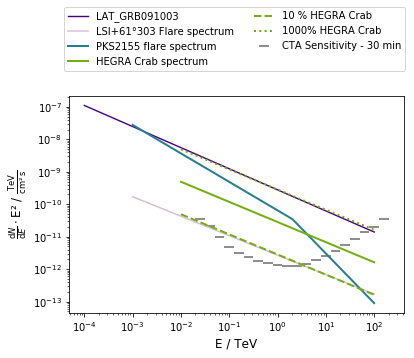

In [24]:
plot_Flux_Energy_LAT('GRB091003',-4,2,True,False,1.99,'indigo')
#plot_Flux_Energy_LAT('GRB090926',-4,2,True,False,1.99,'indigo')
#plot_Flux_Energy_LAT('GRB110721',-4,2,True,False,1.99,'indigo')
Eplot = np.linspace(0.001,100)
plt.plot(Eplot,Values_LS*Eplot*Eplot, color='thistle',label='LSI+61°303 Flare spectrum')
plt.plot(Eplot,Values_Flare*Eplot*Eplot, color=viridis6,lw=2,label='PKS2155 flare spectrum')
plot_Sens('Tev','binwise','dimgray')
plot_HEGRA_Crab(-2,2,True,tugreen)
plt.legend(bbox_to_anchor=(-0.03, 1.09, 1., .101),ncol=2)

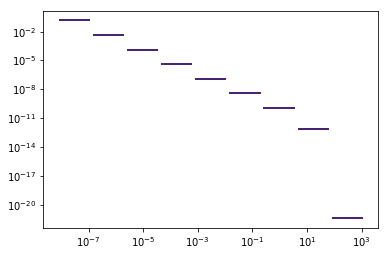

In [154]:
## integrated Crab 
# Powerlaw Indices in TeV 
E0 = 1 
f0 = 3.8*1e-11
alpha = 2.21
Ec = 6 

# Plaw Cut 
def Plaw_Cut(E,E0,Phi,alpha,Ec):
    return Phi*(E/E0)**(-alpha)*np.exp(-E/Ec)

xlin = np.logspace(-2,2)

'''
differential 
'''
#plt.plot(xlin,Plaw_Cut(xlin,E0,f0,alpha,Ec))
'''
integrated
'''
xlin = np.logspace(-8,2,9)
for i in xlin:
    integral = quad(Plaw_Cut,i,i*10,args=(E0,f0,alpha, Ec))[0]
    plt.errorbar(i*6,integral, xerr=5.2*i,yerr=None,fmt='',color=viridis6, ecolor=viridis10, 
                 elinewidth=2, capsiz5=None,errorevery=1)
    #plt.plot(i,integral,'+')
    
plt.xscale('log') ; plt.yscale('log')


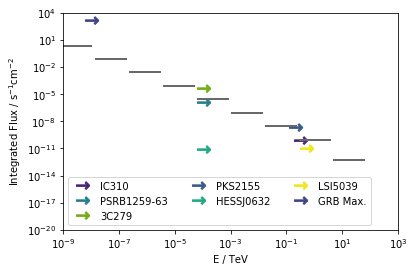

In [26]:
## Crab Nebula
E0 = 1 ; f0 = 3.8*1e-11 ; alpha = 2.21 ;Ec = 6 
 
def Plaw_Cut(E,E0,Phi,alpha,Ec):
    return Phi*(E/E0)**(-alpha)*np.exp(-E/Ec)
plt.yscale('log')
plt.xscale('log')
plt.ylim((1e-20,1e4))
plt.xlim((1e-9,1e3))
xlin = np.logspace(-9,2,10)
for i in xlin:
    integral = quad(Plaw_Cut,i,i*10,args=(E0,f0,alpha, Ec))[0]
    plt.errorbar(i*6,integral, xerr=5.2*i,yerr=None,fmt='',color='dimgray', ecolor='dimgray', 
                 elinewidth=2, capsiz5=None,errorevery=1)
plt.xscale('log') ; plt.yscale('log')
plt.xlabel('E / TeV')
plt.ylabel('Integrated Flux / $\mathrm{s}^{-1} \mathrm{cm}^{-2}$')
    
## Single peakfluxes 
plt.scatter(0.3,6e-11, c=viridis10,marker=r'$\rightarrow$',s=200, label='IC310' )
plt.scatter(0.0001,11e-7, c=viridis6,marker=r'$\rightarrow$',s=200, label='PSRB1259-63' )
plt.scatter(0.0001,350e-7, c='#73ac14',marker=r'$\rightarrow$',s=200, label='3C279' )
plt.scatter(0.2,1.72e-9, c=viridis8,marker=r'$\rightarrow$',s=200, label='PKS2155' )
plt.scatter(0.0001,0.71e-11, c=viridis4,marker=r'$\rightarrow$',s=200, label='HESSJ0632' )
plt.scatter(0.5,8.8e-12, c=viridis0,marker=r'$\rightarrow$',s=200, label='LSI5039' )
plt.scatter(10e-9,1051, c=viridis9,marker=r'$\rightarrow$',s=200, label='GRB Max.' )

plt.legend(ncol = 3)
plt.savefig('Plots/Amplitude.pdf')